# Avacado Project
# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

# Content:
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

In [172]:
#IMPORTING THE LIBRARIES NEEDED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
#READ THE DATASET
data=pd.read_csv('C:/Users/HP/Desktop/data sets/avocado.csv')
data

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

- The dataset comprises of 18249 observations of 14 columns.all the columns and their description:-
- ‘Unamed: 0’- Its just a useless index feature that will be removed later.
- Total Volume- Total sales volume of avocados.
- 4046 - Total sales volume of Small/Medium Hass Avocado.
- 4225 - Total sales volume of Large Hass Avocado.
- 4770 - Total sales volume of Extra Large Hass Avocado.
- Total Bags- Total number of Bags sold.
- Small Bags - Total number of Small Bags sold.
- Large Bags - Total number of Large Bags sold.
- XLarge Bags - Total number of XLarge Bags sold.
- Average Price- This is the target column which we have to predict is continuous in nature and thus the problem is regression.
- we have to categorical features ,which is region and type and the rest columns are continuous in nature.

In [3]:
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

- By examining a single row, we can say something further about the dataset. For example, avocados are packed up in bags and bags may have three types: Small Bags, Large Bags and XLarge Bags. Total Bags indicates the sum of bags used for packaging.

In [4]:
data.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

- The dataset comprises of 18249 observations of 14 columns.all the columns and their description:-
- ‘Unamed: 0’- Its just a useless index feature that will be removed later.
- Total Volume- Total sales volume of avocados.
- 4046 - Total sales volume of Small/Medium Hass Avocado.
- 4225 - Total sales volume of Large Hass Avocado.
- 4770 - Total sales volume of Extra Large Hass Avocado.
- Total Bags- Total number of Bags sold.
- Small Bags - Total number of Small Bags sold.
- Large Bags - Total number of Large Bags sold.
- XLarge Bags - Total number of XLarge Bags sold.
- Average Price- This is the target column which we have to predict is continuous in nature and thus the problem is regression.
- we have to categorical features ,which is region and type and the rest columns are continuous in nature.

In [5]:
print('Avocado Data:',data.shape)

Avocado Data: (18249, 14)


- The dataset comprises of 18249 observations of 14 columns.

In [6]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

- Found out all the column names of the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- AveragePrice, Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags and XLarge Bags is containing float values.
- Unnamed: 0 and year is having integer type value.
- type and region is having string or object typevalues,which we need to encode latter with encoding techniques avilable.

In [8]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

- AveragePrice, Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags and XLarge Bags is containing float values.
- Unnamed: 0 and year is having integer type value.
- type and region is having string or object typevalues,which we need to encode latter with encoding techniques avilable.

In [9]:
data.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

- Above statistics data show that their multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction
- Also, number of rows in each column are same, means there are no null values in the data set.
- Also, the mean and 50%value of most of the column are same and the STD and mean are very close to each other.
- Most of the column statistics data are near to 0 values.
- By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

In [10]:
#CHECKING IS THERE ANY NULL VALUES IN TRAIN DATA
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- There is no null values in the dataset.

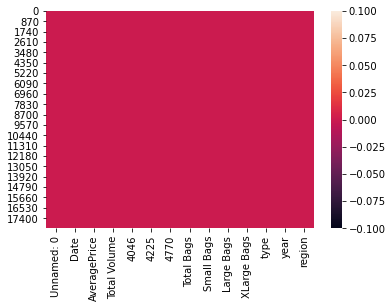

In [11]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

- Above I am checking the null values, as find there are no null values in the data set because the red color is distributed equally correspond to each column.

In [12]:
#Dropping the unwanted column Unnamed: 0:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

- Dropping the unwanted column Unnamed: 0 because it is just a serial number it will not help in increasing the accuracy score in building the model.

In [13]:
# Counting the type column:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

- There are two types of avocados,conventional and organic.

<AxesSubplot:xlabel='type', ylabel='count'>

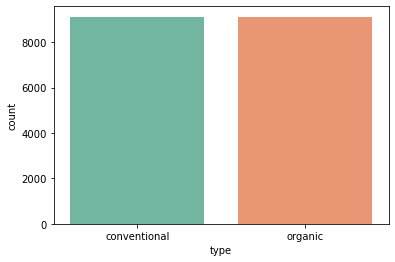

In [14]:
sns.countplot(data['type'],palette='Set2')

- Both the quantities are mostly equal.

In [15]:
#How much type of Avocado is sold in last four year:
data.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

- found that at each year present in the data set, which type of avocado is has total count, so both type of avocado is present almost in same amount in the data set.

<AxesSubplot:xlabel='year', ylabel='count'>

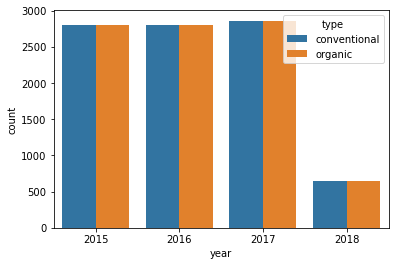

In [16]:
sns.countplot('year', hue='type', data=data)

- found that at each year present in the data set, which type of avocado is has total count, so both type of avocado is present almost in same amount in the data set.

In [17]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

- Found all the name of the regions where avocado is sold.

In [18]:
# finding the average price of avocados for each geographic location
avg_price_by_location = data.groupby(['region'])['AveragePrice'].mean().reset_index()
avg_price_by_location = avg_price_by_location.sort_values(by=['AveragePrice'])
avg_price_by_location

region  AveragePrice
18              Houston      1.047929
11        DallasFtWorth      1.085592
45         SouthCentral      1.101243
9      CincinnatiDayton      1.209201
26            Nashville      1.212101
22           LosAngeles      1.216006
12               Denver      1.218580
33        PhoenixTucson      1.224438
39              Roanoke      1.247929
10             Columbus      1.252781
53     WestTexNewMexico      1.261701
52                 West      1.272219
13              Detroit      1.276095
23           Louisville      1.286686
38      RichmondNorfolk      1.291331
27     NewOrleansMobile      1.304793
19         Indianapolis      1.313994
36             Portland      1.317722
51              TotalUS      1.319024
1               Atlanta      1.337959
15           GreatLakes      1.338550
3                 Boise      1.348136
34           Pittsburgh      1.364320
21             LasVegas      1.380917
6            California      1.395325
46            Southeast      1.398018
41             SanDiego      1.398166
44        SouthCarolina      1.403284
25             Midsouth      1.404763
50                Tampa      1.408846
24    MiamiFtLauderdale      1.428491
48              StLouis      1.430621
35               Plains      1.436509
43              Seattle      1.442574
47              Spokane      1.445592
30   NorthernNewEngland      1.477396
14          GrandRapids      1.505000
31              Orlando      1.506213
20         Jacksonville      1.510947
16   HarrisburgScranton      1.513284
5      BuffaloRochester      1.516834
49             Syracuse      1.520325
4                Boston      1.530888
2   BaltimoreWashington      1.534231
37    RaleighGreensboro      1.555118
8               Chicago      1.556775
0                Albany      1.561036
29            Northeast      1.601923
7             Charlotte      1.606036
40           Sacramento      1.621568
32         Philadelphia      1.632130
28              NewYork      1.727574
42         SanFrancisco      1.804201
17  HartfordSpringfield      1.818639

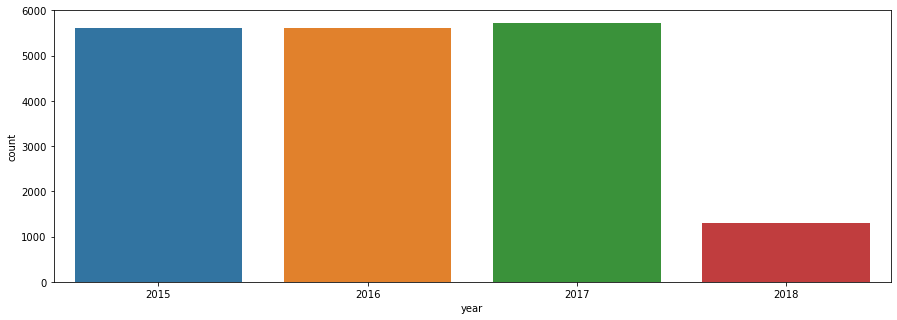

In [19]:
# Plotting year column 
plt.figure(figsize=(15,5))
sns.countplot('year',data=data)
plt.show()

- found that at each year present in the data set, which type of avocado is has total count, so both type of avocado is present almost in same amount in the data set.

<AxesSubplot:xlabel='AveragePrice'>

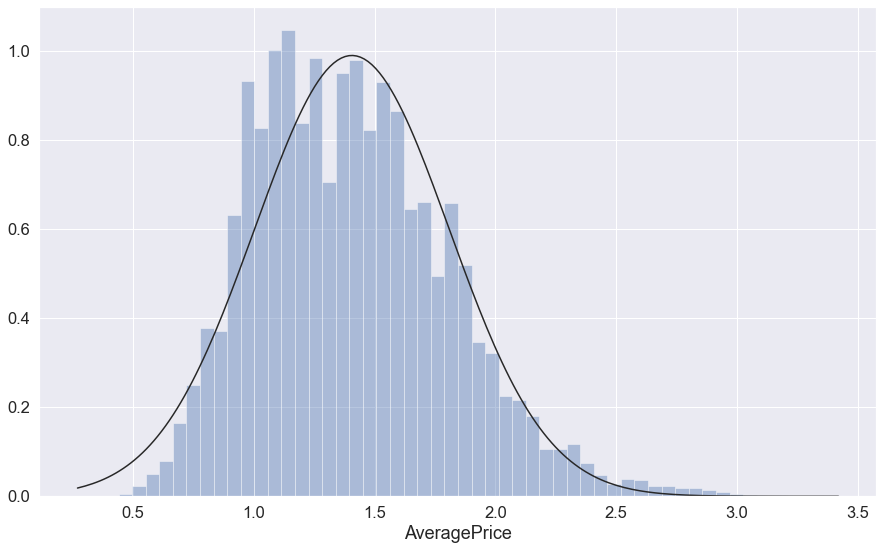

In [20]:
# Checking normal distribution of the Target column,Average Price:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=data.AveragePrice, kde=False, fit=norm)

- The Target column,Average Price is normally distributed.

In [21]:
# Creating two extra column as Month and Day from the Date Column:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [22]:
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  Day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

- two extra column as Month and Day is created from the Date Column.

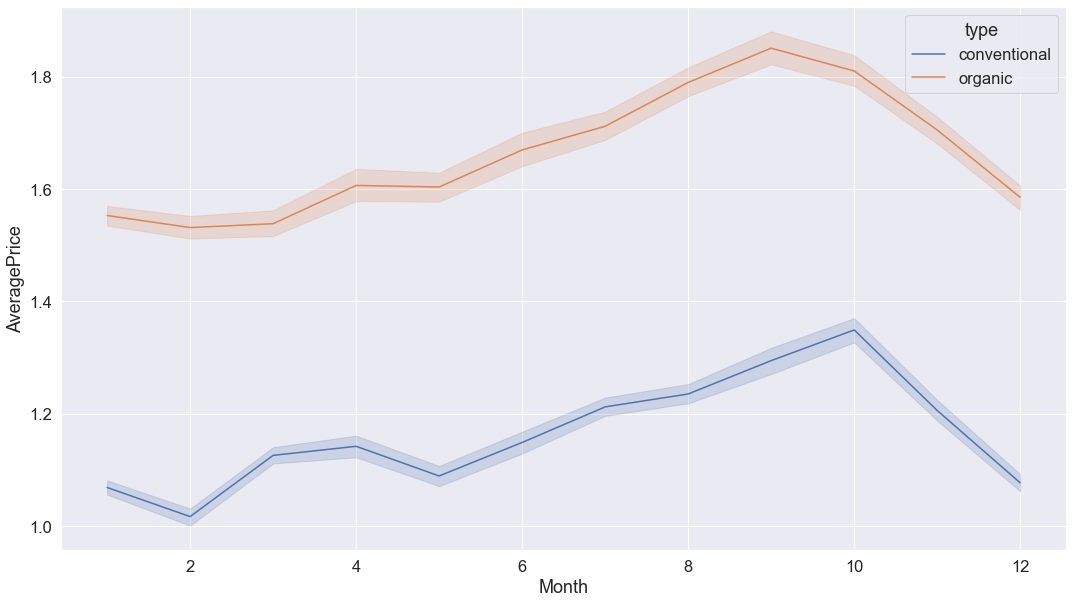

In [23]:
# Plotting Average price vs type vs Month column:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=data)
plt.show()

- From above graph:
- There is hike between month 8–10 of both type of avocado both for conventional and organic type of avocado.
- Also, the conventional type of avocado is varying in term of price as seen because in starting the price is high but then it get decrease and so on.

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

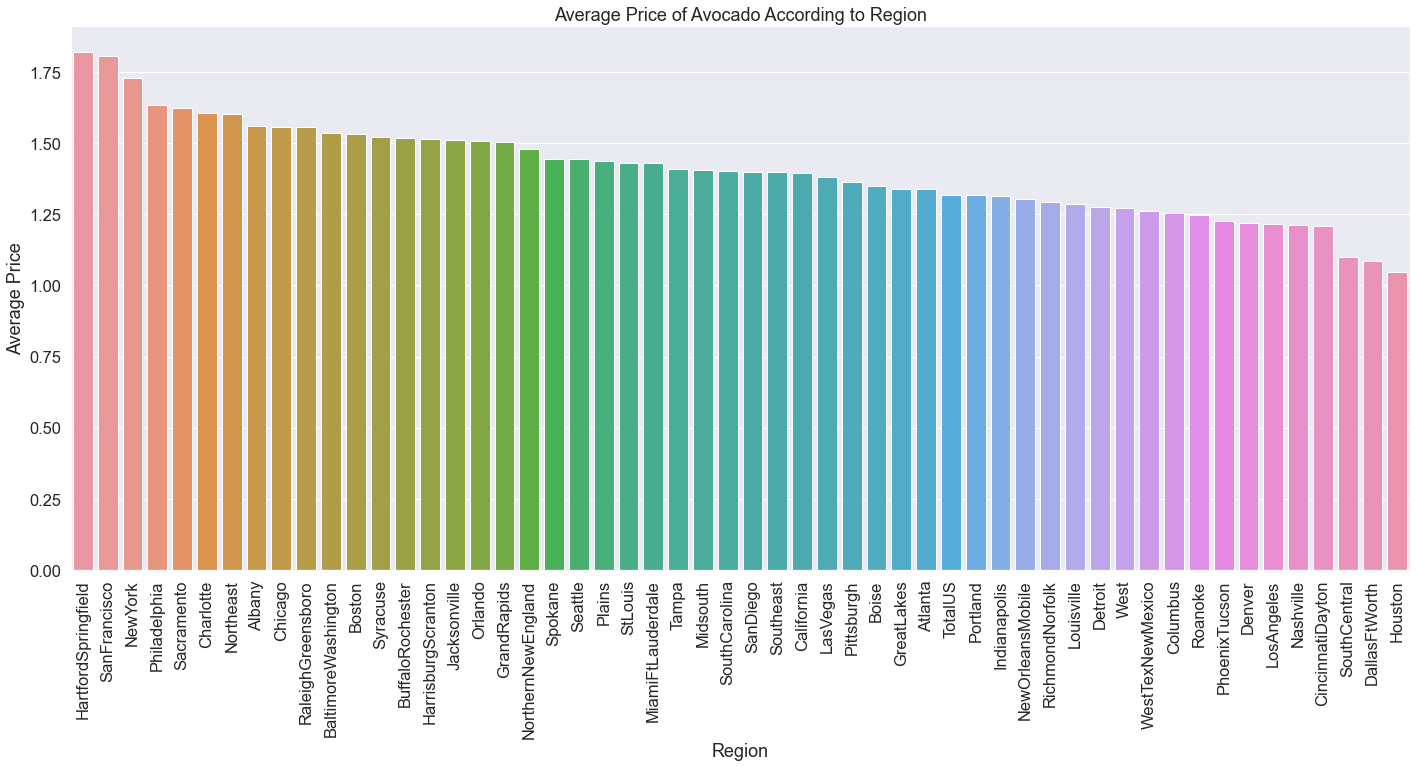

In [24]:
# Average Price vs Region
region_list=list(data.region.unique())
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

- it looks like Houston, Dallas/Ft. Worth, and South Central are the three places with the cheapest avocado prices with prices ranging between $1.08 and \$1.12. On the other hand, New York, Hartfold/Springfield, and San Francisco are the three places with the most expensive avocado prices with prices ranging between $1.68 to \$1.77.
- The graph above doesn't take into consideration if the avocados are organic or conventional. Organic and conventional avocados usually have different prices from each other, so we will find the average avocado prices for each geographic location with the type of avocado taken into consideration.

In [25]:
# finding the average for each avocado type and each region:
newdf = data.groupby(['region','type'])['AveragePrice'].mean().reset_index()
newdf

region          type  AveragePrice
0                 Albany  conventional      1.348757
1                 Albany       organic      1.773314
2                Atlanta  conventional      1.068817
3                Atlanta       organic      1.607101
4    BaltimoreWashington  conventional      1.344201
..                   ...           ...           ...
103              TotalUS       organic      1.546036
104                 West  conventional      0.985089
105                 West       organic      1.559349
106     WestTexNewMexico  conventional      0.842130
107     WestTexNewMexico       organic      1.688855

[108 rows x 3 columns]

- created a dataset for better analysis od region type and Average Price.

Text(0.5, 1.0, 'Average of Total Volume According to Region')

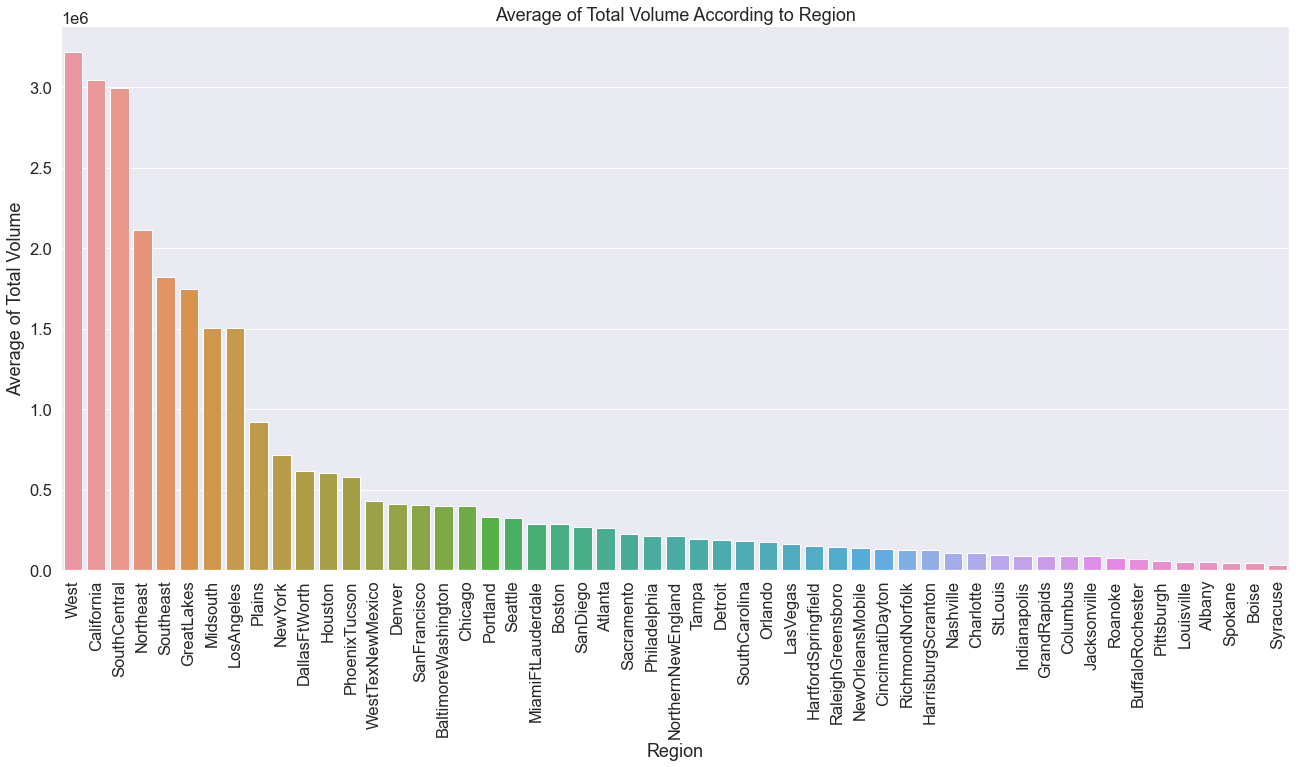

In [26]:
# Average total volume vs Region:
filter1=data.region!='TotalUS'
df1=data[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

- The west Region is higher in Average of total volume and Syracuse region is lowest in Average of total volume.

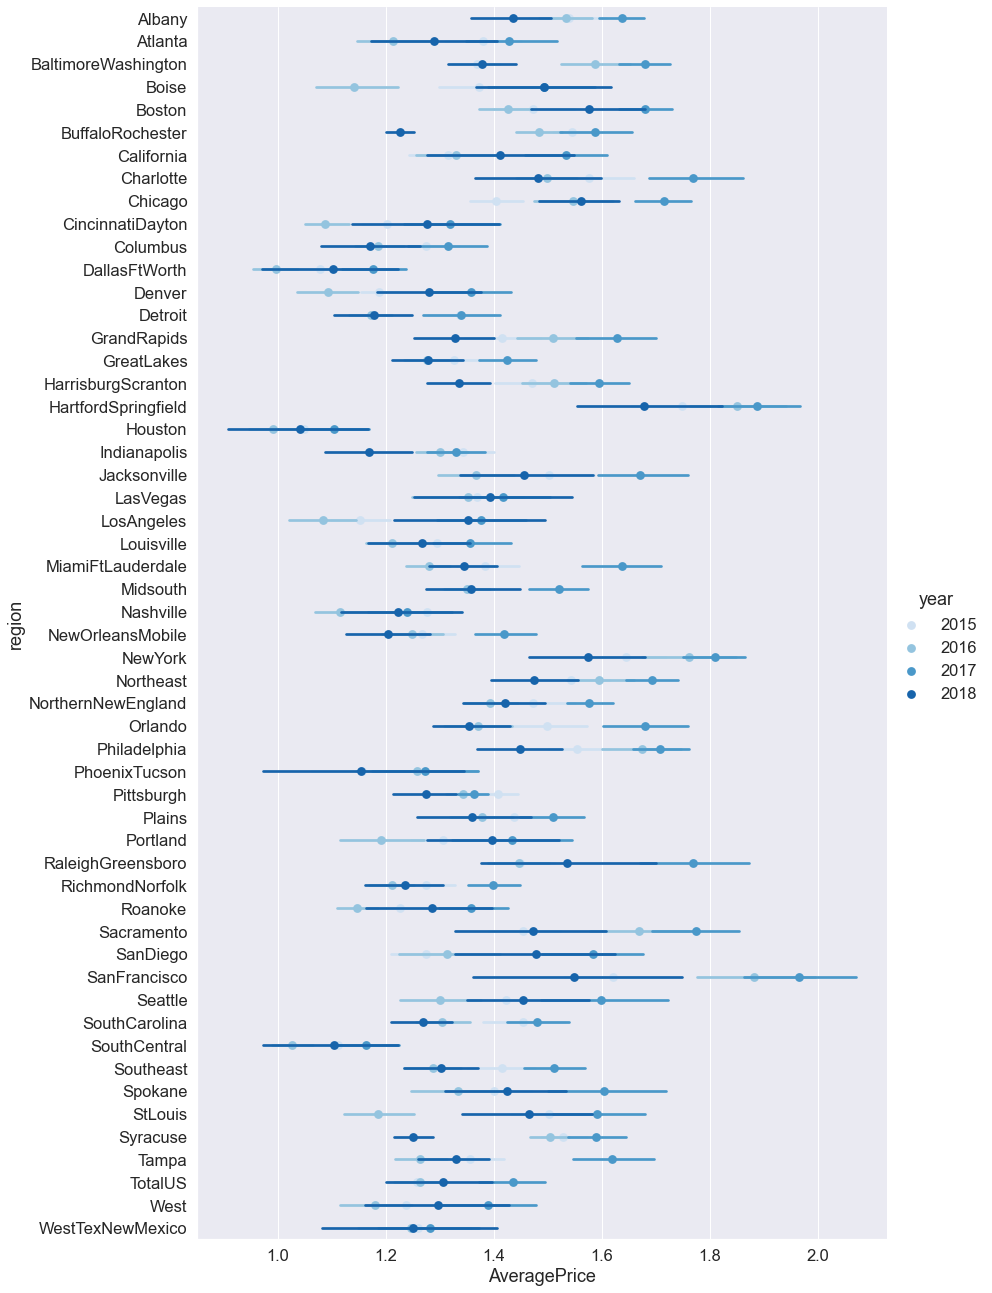

In [27]:
# Average price vs Region factor plot:
g = sns.factorplot('AveragePrice','region',data=data,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

- we can see here Region and year wise Average price of the avocados sold.

Text(0.5, 1.0, 'Average Price')

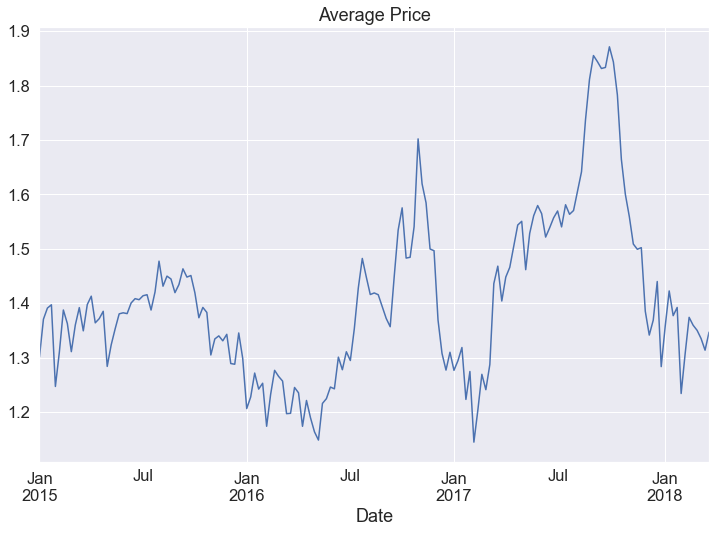

In [28]:
# Average price vs Date
byDate=data.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

- We can see that in mid 2017 Average price of avocado is highest and in mid 2016 the average price of the avocados is the lowest.

In [29]:
# Dropping the date coumn:
data.drop("Date",axis=1,inplace=True)
data

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[18249 rows x 14 columns]

- Droping the date column because we have already created the month and day column separately and the year column is already there from before hand.

In [30]:
# Encoding the region column with Label Encoder.
le=LabelEncoder()
data1=le.fit_transform(data['region'])
data1

array([ 0,  0,  0, ..., 53, 53, 53])

In [31]:
data['region'] = data1
data

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  region  Month  \
0         8603.62       93.25          0.0  conventional  2015       0     12   
1         9408.07       97.49          0.0  conventional  2015       0     12   
2         8042.21      103.14          0.0  conventional  2015       0     12   
3         5677.40      133.76          0.0  conventional  2015       0     12   
4         5986.26      197.69          0.0  conventional  2015       0     11   
...           ...         ...          ...           ...   ...     ...    ...   
18244    13066.82      431.85          0.0       organic  2018      53      2   
18245     8940.04      324.80          0.0       organic  2018      53      1   
18246     9351.80       42.31          0.0       organic  2018      53      1   
18247    10919.54       50.00          0.0       organic  2018      53      1   
18248    11988.14       26.01          0.0       organic  2018      53      1   

       Day  
0       27  
1       20  
2       13  
3        6  
4       29  
...    ...  
18244    4  
18245   28  
18246   21  
18247   14  
18248    7  

[18249 rows x 14 columns]

- The region column is encoded serially with different region available in the data set.

In [32]:
#checking the shape
array = data['type']

array.shape

(18249,)

In [33]:
# Encoding the type column with Label Encoder.
le=LabelEncoder()
data2=le.fit_transform(data['type'])
data2

array([0, 0, 0, ..., 1, 1, 1])

In [34]:
data['type'] = data2
data

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0         8603.62       93.25          0.0     0  2015       0     12   27  
1         9408.07       97.49          0.0     0  2015       0     12   20  
2         8042.21      103.14          0.0     0  2015       0     12   13  
3         5677.40      133.76          0.0     0  2015       0     12    6  
4         5986.26      197.69          0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244    13066.82      431.85          0.0     1  2018      53      2    4  
18245     8940.04      324.80          0.0     1  2018      53      1   28  
18246     9351.80       42.31          0.0     1  2018      53      1   21  
18247    10919.54       50.00          0.0     1  2018      53      1   14  
18248    11988.14       26.01          0.0     1  2018      53      1    7  

[18249 rows x 14 columns]

In [35]:
data['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

- The region column is encoded serially with different region available in the data set.

In [36]:
data['type'].unique()

array([0, 1])

In [37]:
data = pd.DataFrame(data=data)
data

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0         8603.62       93.25          0.0     0  2015       0     12   27  
1         9408.07       97.49          0.0     0  2015       0     12   20  
2         8042.21      103.14          0.0     0  2015       0     12   13  
3         5677.40      133.76          0.0     0  2015       0     12    6  
4         5986.26      197.69          0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244    13066.82      431.85          0.0     1  2018      53      2    4  
18245     8940.04      324.80          0.0     1  2018      53      1   28  
18246     9351.80       42.31          0.0     1  2018      53      1   21  
18247    10919.54       50.00          0.0     1  2018      53      1   14  
18248    11988.14       26.01          0.0     1  2018      53      1    7  

[18249 rows x 14 columns]

- The type column is converted to numerical.Conventional= 0 and organic =1.

In [38]:
data.shape

(18249, 14)

In [39]:
data.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object

- now all the data is numerical in type.

In [40]:
# Checking Multi-colinearity
dfcor = data.corr()
dfcor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
region           -0.011716      0.174176  0.192073  0.145726  0.095252   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
Day               0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.615845   
Total Volume    0.963047    0.967238    0.880640     0.747157 -0.232434   
4046            0.920057    0.925280    0.838645     0.699377 -0.225819   
4225            0.905787    0.916031    0.810015     0.688809 -0.232289   
4770            0.792314    0.802733    0.698471     0.679861 -0.210027   
Total Bags      1.000000    0.994335    0.943009     0.804233 -0.217788   
Small Bags      0.994335    1.000000    0.902589     0.806845 -0.220535   
Large Bags      0.943009    0.902589    1.000000     0.710858 -0.193177   
XLarge Bags     0.804233    0.806845    0.710858     1.000000 -0.175483   
type           -0.217788   -0.220535   -0.193177    -0.175483  1.000000   
year            0.071552    0.063915    0.087891     0.081033 -0.000032   
region          0.175256    0.164702    0.198768     0.082281 -0.000280   
Month          -0.022724   -0.023126   -0.020187    -0.012969 -0.000085   
Day            -0.004988   -0.003870   -0.008352     0.000319 -0.000013   

                  year    region     Month       Day  
AveragePrice  0.093197 -0.011716  0.162409  0.027386  
Total Volume  0.017193  0.174176 -0.024689 -0.009747  
4046          0.003353  0.192073 -0.025803 -0.010159  
4225         -0.009559  0.145726 -0.022108 -0.012393  
4770         -0.036531  0.095252 -0.033424 -0.009009  
Total Bags    0.071552  0.175256 -0.022724 -0.004988  
Small Bags    0.063915  0.164702 -0.023126 -0.003870  
Large Bags    0.087891  0.198768 -0.020187 -0.008352  
XLarge Bags   0.081033  0.082281 -0.012969  0.000319  
type         -0.000032 -0.000280 -0.000085 -0.000013  
year          1.000000 -0.000055 -0.177050  0.004475  
region       -0.000055  1.000000 -0.000144 -0.000021  
Month        -0.177050 -0.000144  1.000000  0.010621  
Day           0.004475 -0.000021  0.010621  1.000000

- average price is co-related with type.
- total volume is co-related with x-large bags,Large bags,4046,4225,4770,Total Bags,Small Bags and Large Bags.
- 4046,4225,4770,Total bags,Small Bags,Large Bags and XL Large Bags are corelated with eachother.
- type is not corelated with any of the features other than Average price.
- year,month ,day,region is not co-related with each other and also not with the other features.

<AxesSubplot:>

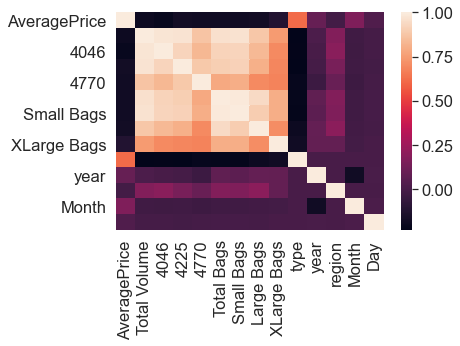

In [41]:
sns.heatmap(dfcor)

- average price is co-related with type.
- total volume is co-related with x-large bags,Large bags,4046,4225,4770,Total Bags,Small Bags and Large Bags.
- 4046,4225,4770,Total bags,Small Bags,Large Bags and XL Large Bags are corelated with eachother.
- type is not corelated with any of the features other than Average price.
- year,month ,day,region is not co-related with each other and also not with the other features.

<AxesSubplot:>

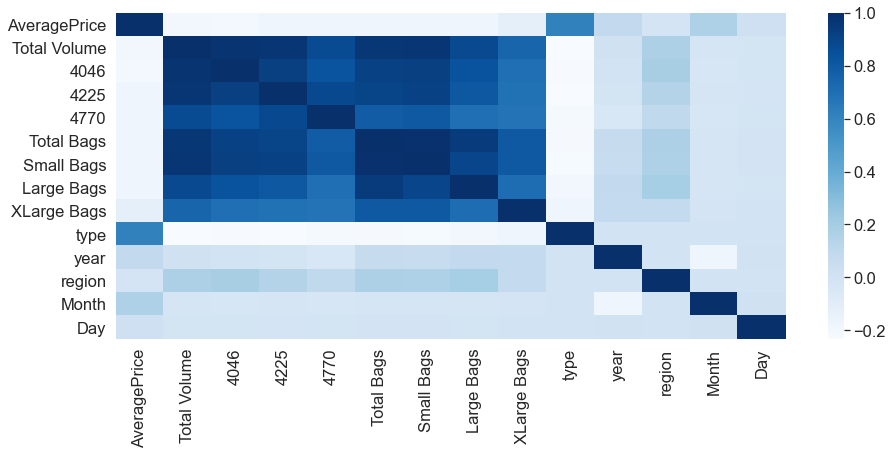

In [42]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

- average price is co-related with type.
- total volume is co-related with x-large bags,Large bags,4046,4225,4770,Total Bags,Small Bags and Large Bags.
- 4046,4225,4770,Total bags,Small Bags,Large Bags and XL Large Bags are corelated with eachother.
- type is not corelated with any of the features other than Average price.
- year,month ,day,region is not co-related with each other and also not with the other features.

<AxesSubplot:>

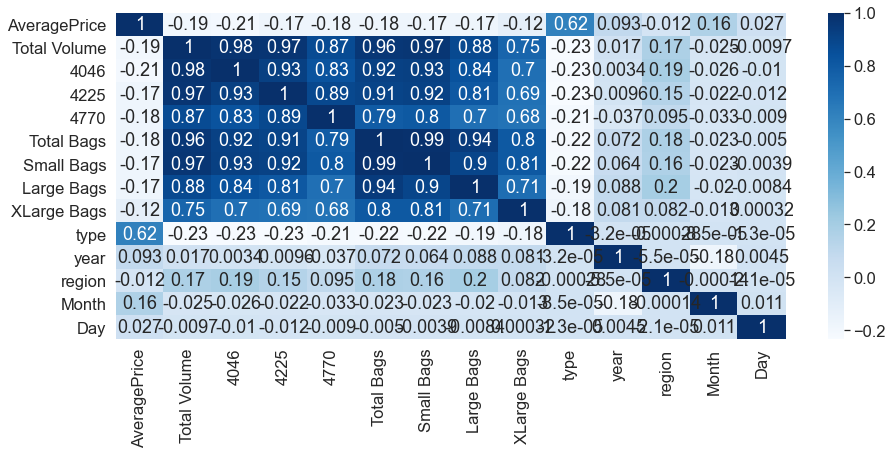

In [43]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

- average price is co-related with type.
- total volume is co-related with x-large bags,Large bags,4046,4225,4770,Total Bags,Small Bags and Large Bags.
- 4046,4225,4770,Total bags,Small Bags,Large Bags and XL Large Bags are corelated with eachother.
- type is not corelated with any of the features other than Average price.
- year,month ,day,region is not co-related with each other and also not with the other features.

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
type            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
year            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
region          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Month                 AxesSubplot(0.125,0.125;0.168478x0.16413)
Day                AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

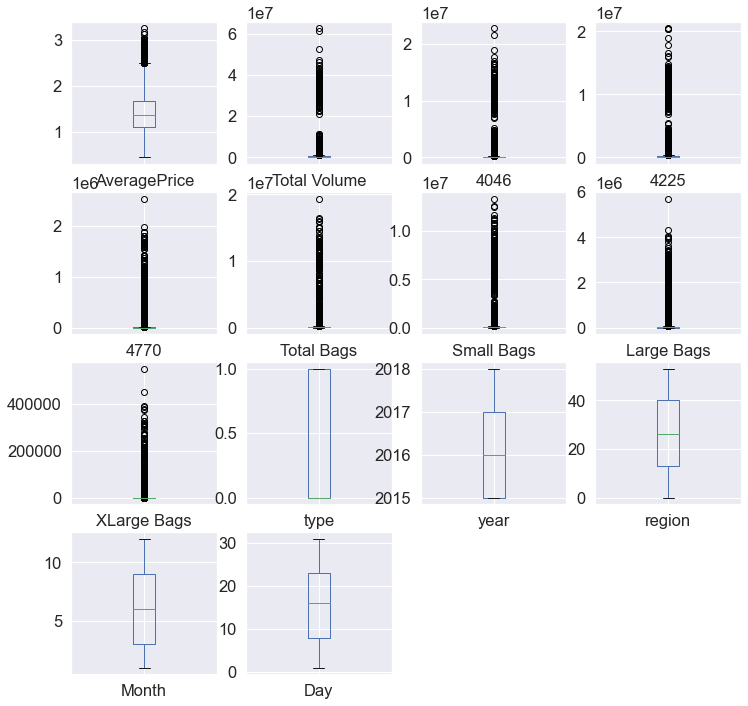

In [44]:
#Checking outliers by using boxplot:
data.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,12))

- Got outliers in xLarge Bags,Large Bags,Small Bags,Total Bags,4770,4225,4046 and in Total Volume.
- From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
- So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are find the IQR, zscore values etc
- I am using zscore value then again i will check if there are some of the outliers or not.

# Outlier Removal:

In [45]:
#REMOVING OUTLIERS BY USING z-SCORE:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<2).all(axis=1)]
print(data_final.shape)

(18249, 14)
(16640, 14)


- We loose some colums after using Z-score .

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
type            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
year            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
region          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Month                 AxesSubplot(0.125,0.125;0.168478x0.16413)
Day                AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

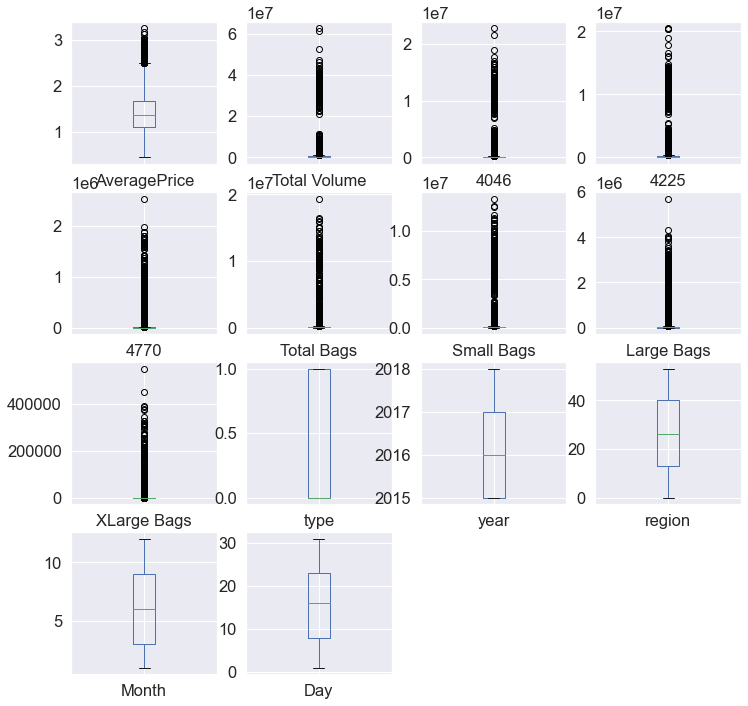

In [46]:
#Checking outliers again by using boxplot:
data.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,12))

In [48]:
from scipy import stats
def remove_outlier(data):
    for col in data.columns:
        if((data[col].dtype == 'float64') | (data[col].dtype == 'float64')):
            percentile = data[col].quantile([0.25, 0.75]).values
            Q1 = percentile[0]
            Q3 = percentile[1]
            IQR = stats.iqr(df[col], interpolation='midpoint')
            up_lim = Q3+1.5*IQR
            low_lim = Q1-1.5*IQR
            data[col] = np.where(data[col] < low_lim, Q1, data[col])
            data[col] = np.where(data[col] > up_lim, Q3, data[col])
        else:
            df[col] = df[col]
    return data


AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
type            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
year            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
region          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Month                 AxesSubplot(0.125,0.125;0.168478x0.16413)
Day                AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

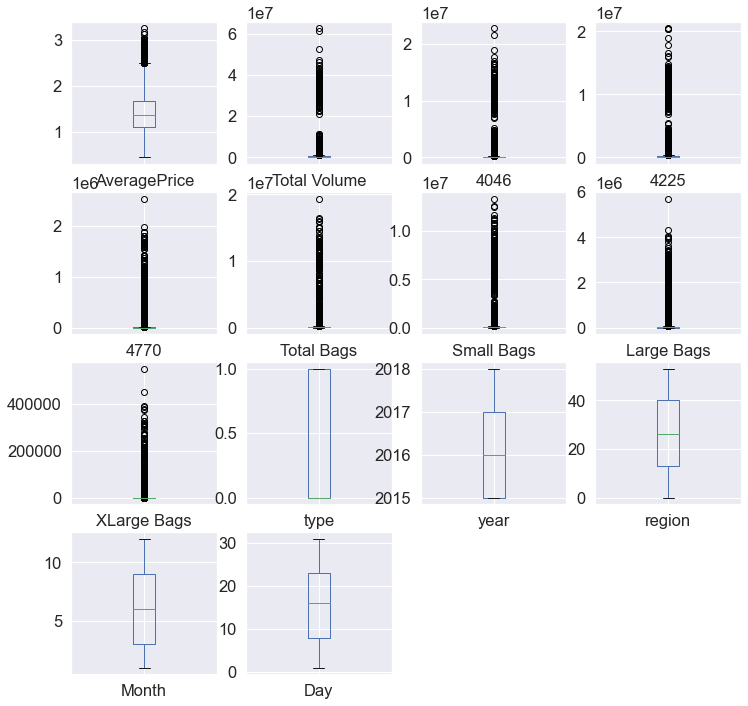

In [49]:
#Checking outliers again by using boxplot:
data.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,12))

- We still have outliers after using z-score,we will latter remove it log transformation.

In [50]:

#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

- The features Total volume,4046,4225,4770,Total Bags ,Small Bags,Large Bags,XLargeBAgs is highly skewed,we will remove the skewness by using log transformation latter.

In [51]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [52]:
#Lets Again Check the Skewness
data.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

- We can see that the skewness is reduced in high rate.Now tha data is ready for importing it to the model.

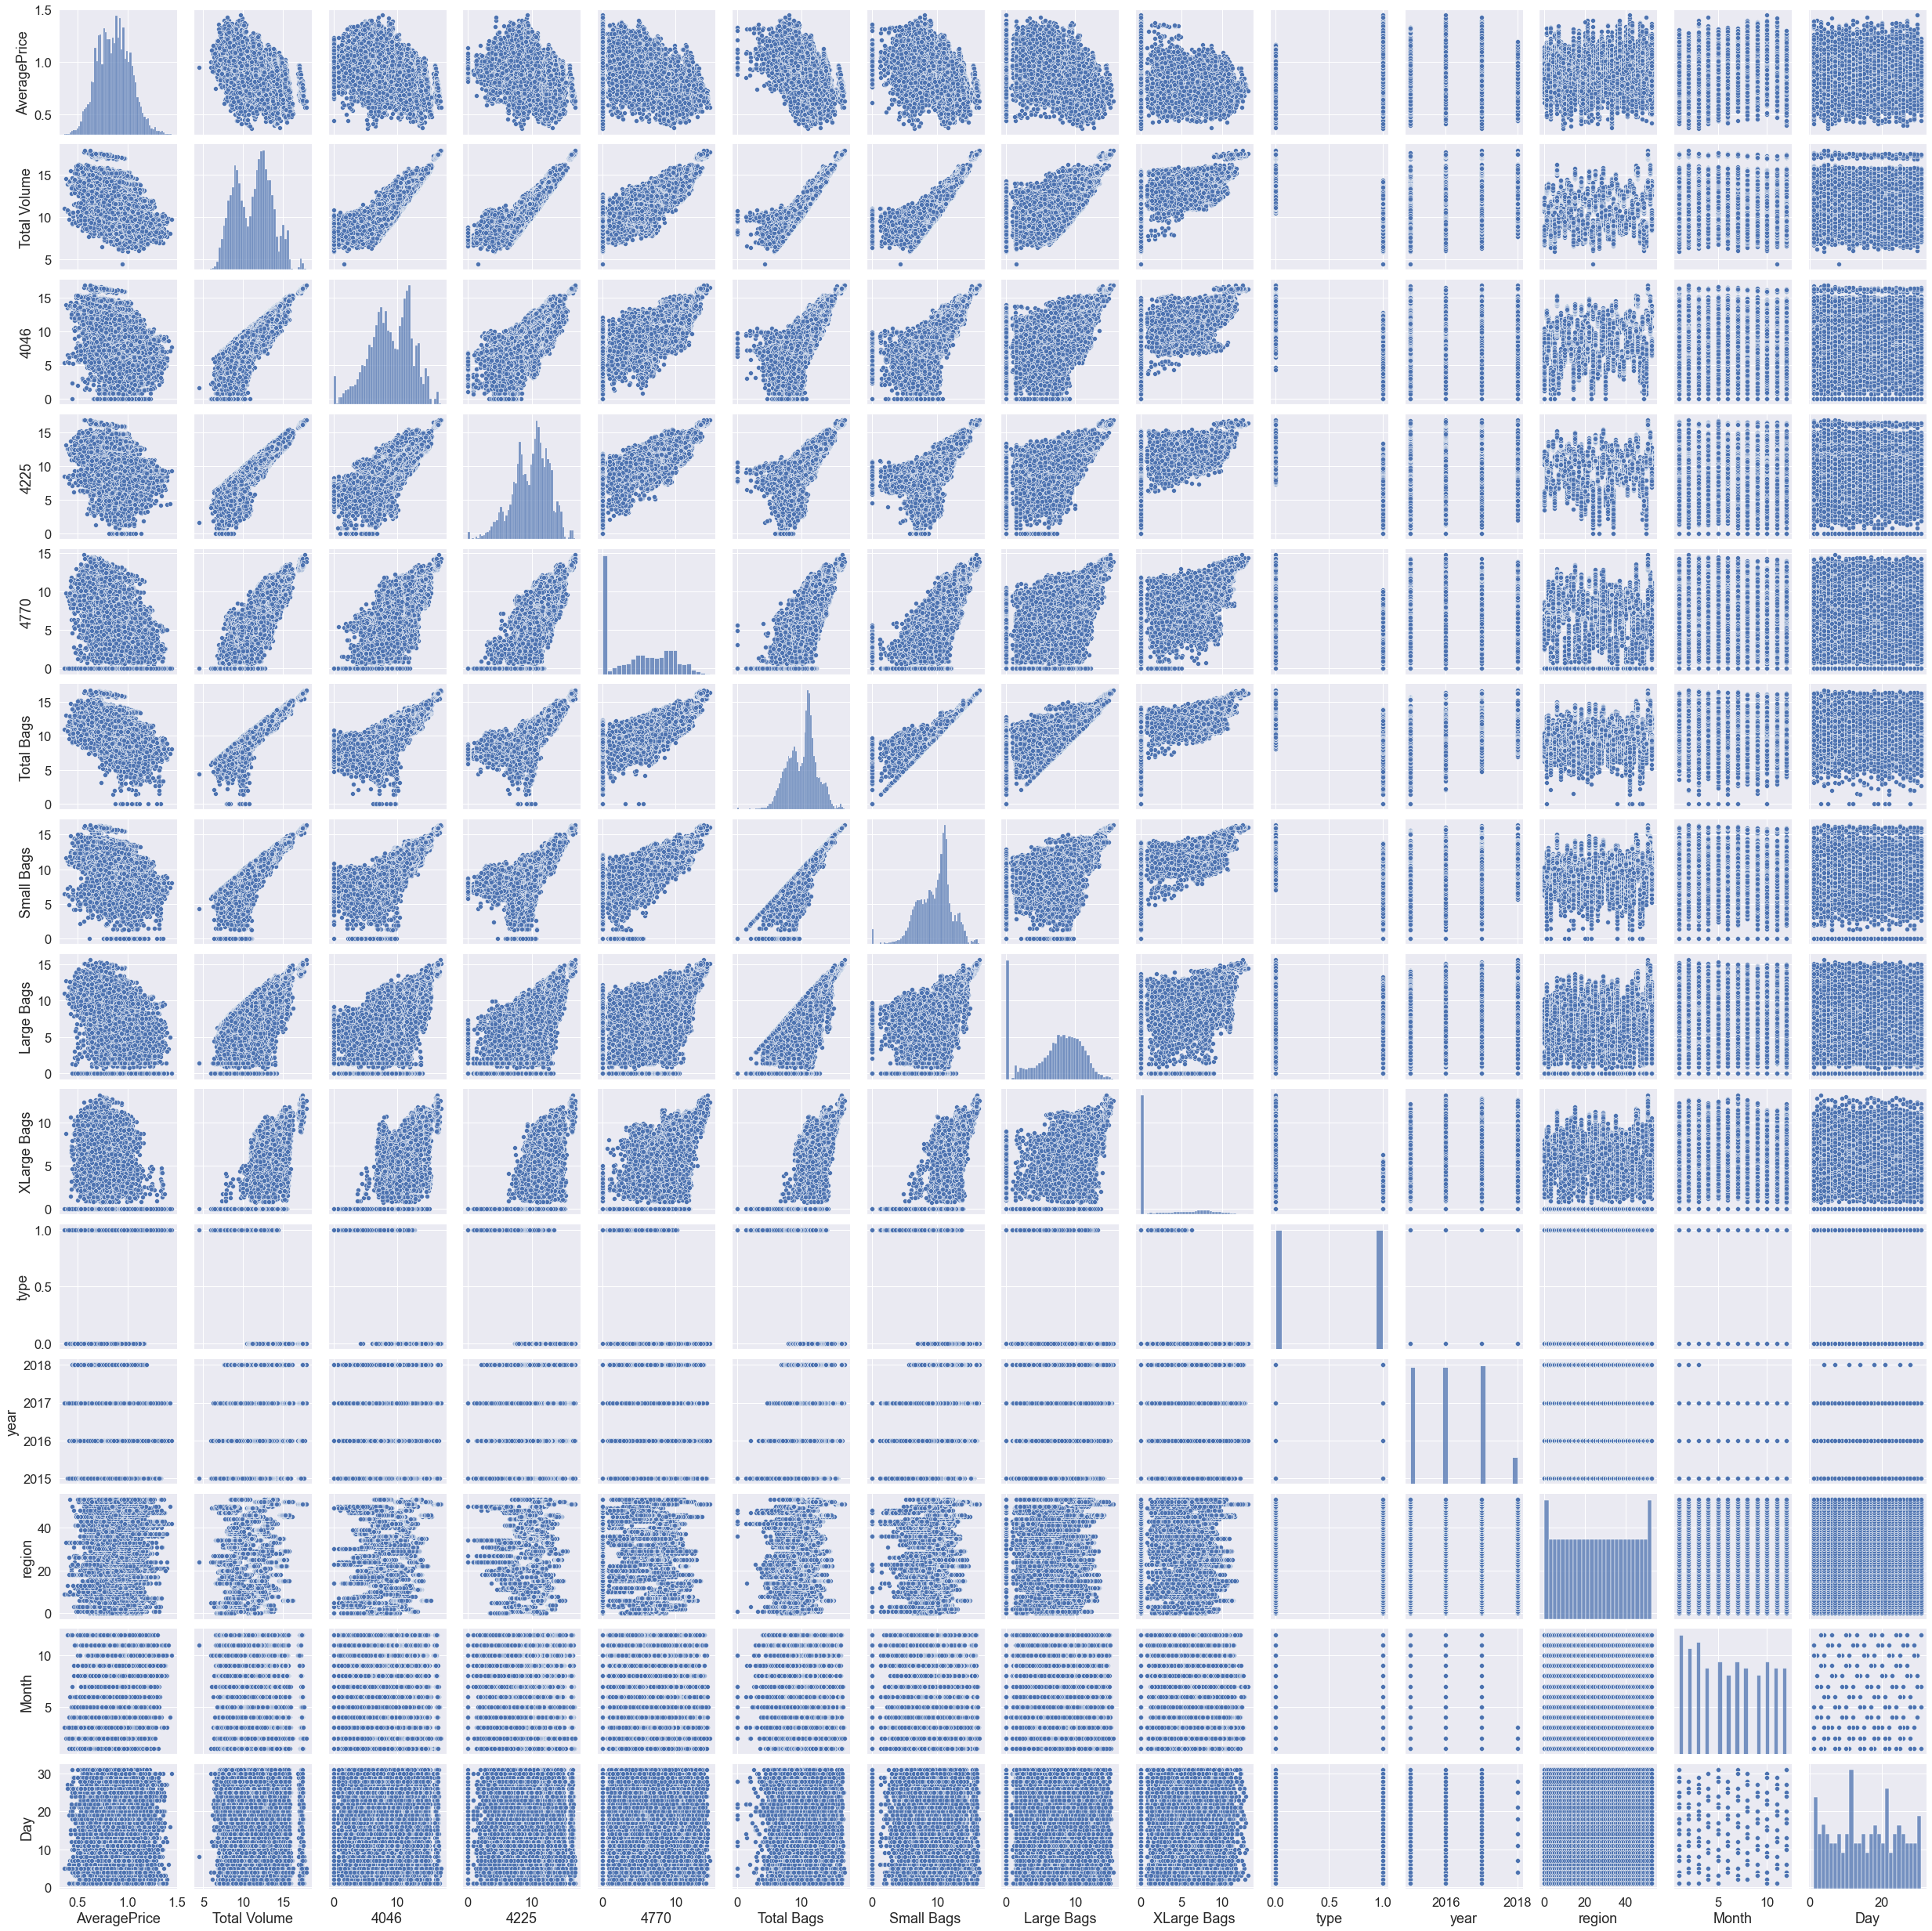

In [53]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

# BIVARIATE ANALYSIS:

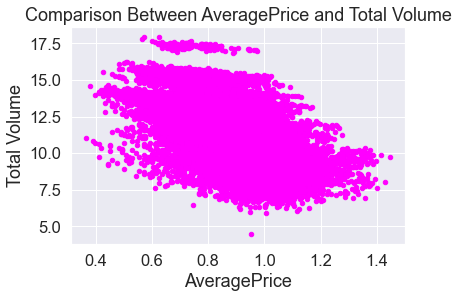

In [169]:
# Total volume vs Average Price
data.plot(kind = 'scatter', x = 'AveragePrice', y = 'Total Volume', color = 'magenta')
plt.xlabel('AveragePrice')
plt.ylabel('Total Volume')
plt.title("Comparison Between AveragePrice and Total Volume")
plt.show()

- As usual Average price will increase in decrease of Total volume.

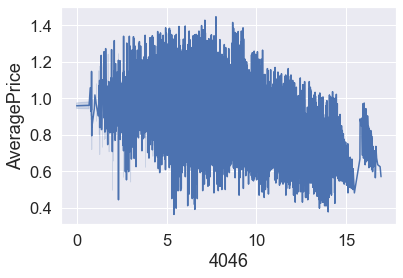

In [55]:
#Average price vs 4046
sns.lineplot(data["4046"],data["AveragePrice"])
plt.show()

- Average Price decreases as the 4046 increases.

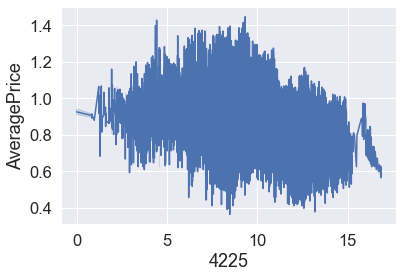

In [56]:
# Average Price vs 4225
sns.lineplot(data["4225"],data["AveragePrice"])
plt.show()

- Average price is higher when 4225 is in mid range.

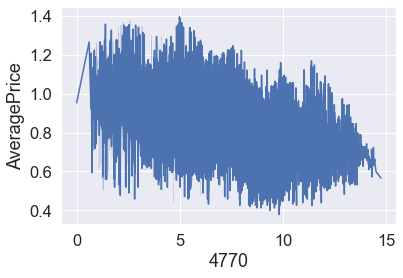

In [57]:
#Avearge price vs 4770:
sns.lineplot(data["4770"],data["AveragePrice"])
plt.show()

- Average price varies in great range with compared to 4770.

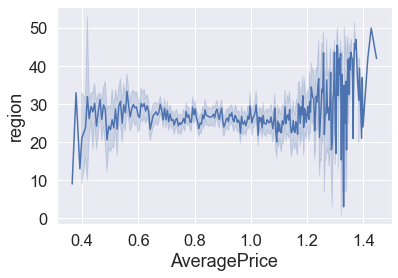

In [170]:
#Region vs AveragePrice:
sns.lineplot(data["AveragePrice"],data["region"])
plt.show()

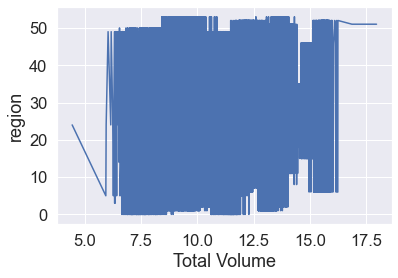

In [59]:
sns.lineplot(data["Total Volume"],data["region"])
plt.show()

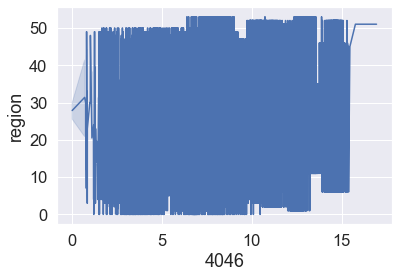

In [60]:
sns.lineplot(data["4046"],data["region"])
plt.show()

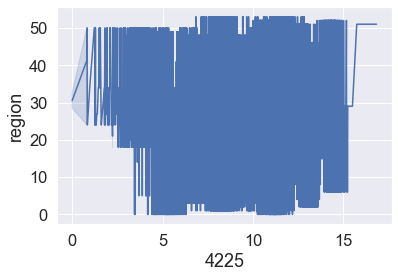

In [61]:

sns.lineplot(data["4225"],data["region"])
plt.show()

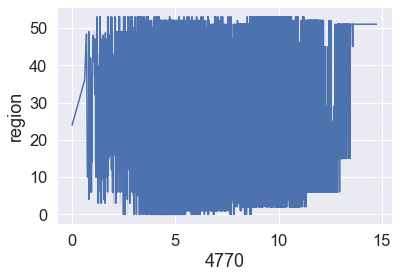

In [62]:
sns.lineplot(data["4770"],data["region"])
plt.show()

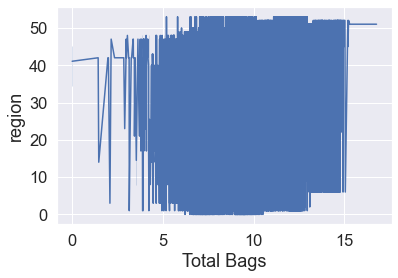

In [63]:
sns.lineplot(data["Total Bags"],data["region"])
plt.show()

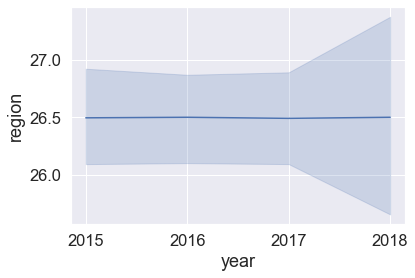

In [64]:
sns.lineplot(data["year"],data["region"])
plt.show()

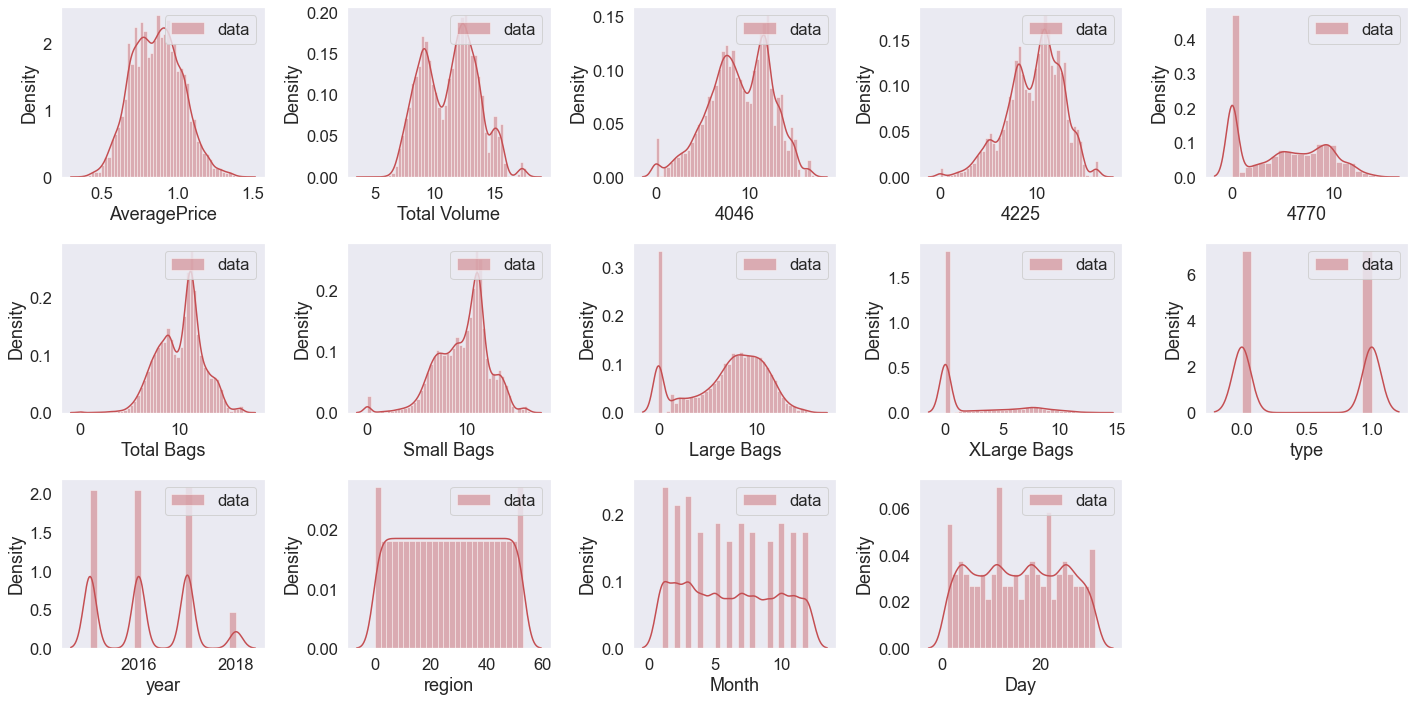

In [65]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

- Average price column is normally distributing over the histogram.
- Rest of the data are not much varying in term of numbers, so they are almost left skewed data
- To make the column as normal distributed we can use different methods.

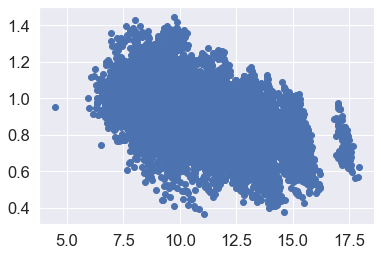

In [66]:
plt.scatter(data['Total Volume'],data['AveragePrice'])

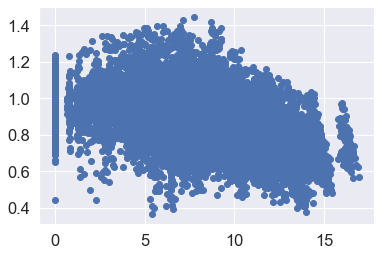

In [67]:
plt.scatter(data['4046'],data['AveragePrice'])

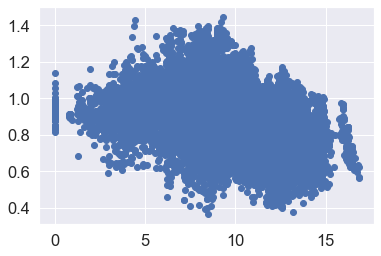

In [68]:
plt.scatter(data['4225'],data['AveragePrice'])

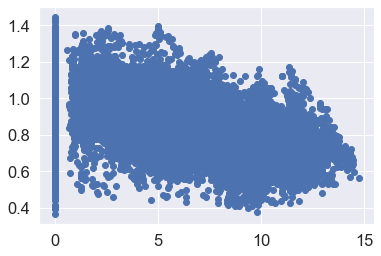

In [69]:

plt.scatter(data['4770'],data['AveragePrice'])

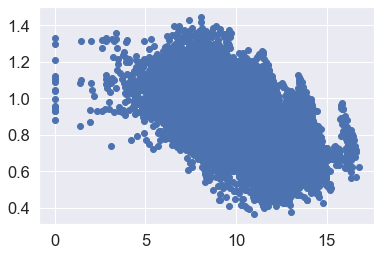

In [70]:
plt.scatter(data['Total Bags'],data['AveragePrice'])

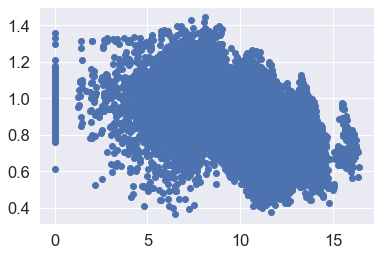

In [71]:
plt.scatter(data['Small Bags'],data['AveragePrice'])

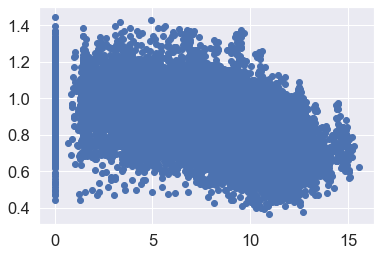

In [72]:
plt.scatter(data['Large Bags'],data['AveragePrice'])

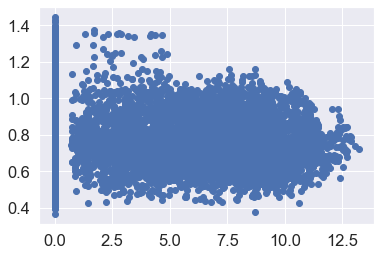

In [73]:
plt.scatter(data['XLarge Bags'],data['AveragePrice'])

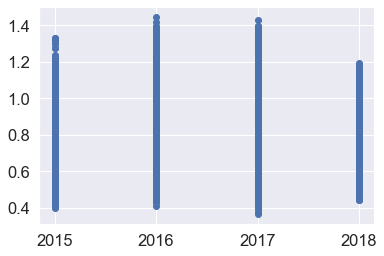

In [74]:
plt.scatter(data['year'],data['AveragePrice'])

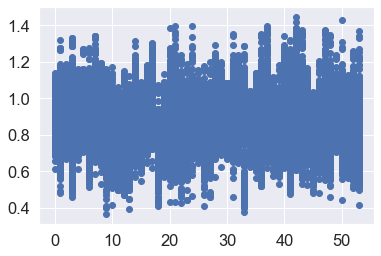

In [75]:
plt.scatter(data['region'],data['AveragePrice'])

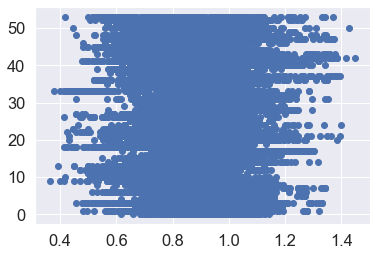

In [76]:
plt.scatter(data['AveragePrice'],data['region'])

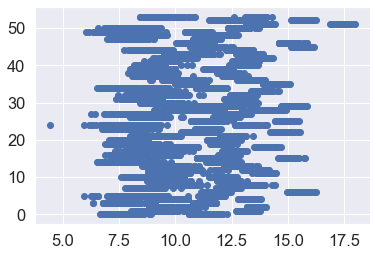

In [77]:
plt.scatter(data['Total Volume'],data['region'])

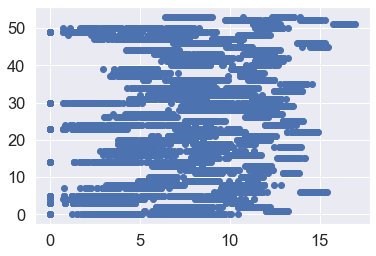

In [78]:
plt.scatter(data['4046'],data['region'])

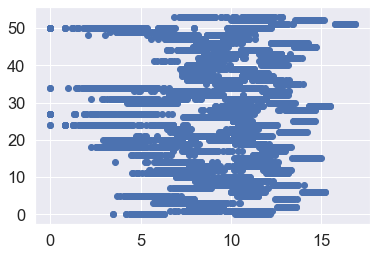

In [79]:
plt.scatter(data['4225'],data['region'])

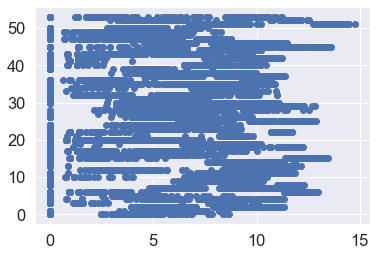

In [80]:
plt.scatter(data['4770'],data['region'])

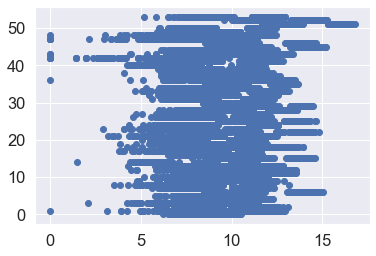

In [81]:

plt.scatter(data['Total Bags'],data['region'])

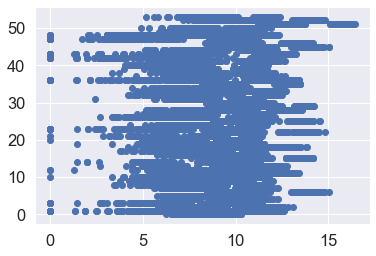

In [82]:

plt.scatter(data['Small Bags'],data['region'])

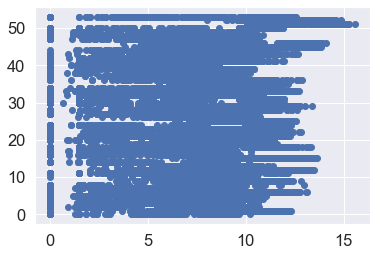

In [83]:
plt.scatter(data['Large Bags'],data['region'])

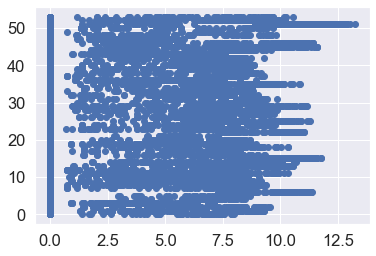

In [84]:
plt.scatter(data['XLarge Bags'],data['region'])

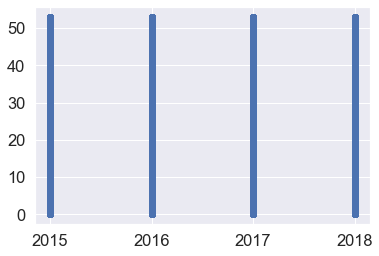

In [85]:
plt.scatter(data['year'],data['region'])

- The relation between the Average price and each of the continuous variable is negatively correlated as increase in 'Total Volume','4046', '4225', '4770','Total Bags','Small Bags','Large Bags','XLarge Bags' is making the Average price decrease.

In [86]:
# Dropping the year column as it is unwanted:
data.drop("year", axis=1,inplace=True)
data

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          0.845868     11.070344  6.944801  10.905146  3.895080    9.070833   
1          0.854415     10.912867  6.515127  10.706381  4.083115    9.159737   
2          0.657520     11.680313  6.679222  11.600485  4.879007    9.005325   
3          0.732368     11.277116  7.032624  11.184108  4.298373    8.667708   
4          0.824175     10.840377  6.848515  10.688288  4.340944    8.729874   
...             ...           ...       ...        ...       ...         ...   
18244      0.966984      9.745419  7.624599   7.333154  0.000000    9.510421   
18245      0.996949      9.538855  7.083975   8.141044  0.000000    9.134090   
18246      1.054312      9.530085  7.084159   7.805389  6.591591    9.147945   
18247      1.075002      9.693150  7.332127   8.000363  6.590315    9.302969   
18248      0.963174      9.769418  7.971006   7.765200  5.418453    9.393924   

       Small Bags  Large Bags  XLarge Bags  type  region  Month  Day  
0        9.060055    4.545951          0.0     0       0     12   27  
1        9.149429    4.589955          0.0     0       0     12   20  
2        8.992584    4.645736          0.0     0       0     12   13  
3        8.644425    4.903495          0.0     0       0     12    6  
4        8.697389    5.291746          0.0     0       0     11   29  
...           ...         ...          ...   ...     ...    ...  ...  
18244    9.477908    6.070391          0.0     1      53      2    4  
18245    9.098407    5.786284          0.0     1      53      1   28  
18246    9.143431    3.768384          0.0     1      53      1   21  
18247    9.298401    3.931826          0.0     1      53      1   14  
18248    9.391757    3.296207          0.0     1      53      1    7  

[18249 rows x 13 columns]

# Separating the features and target varible:

In [87]:

y = data['AveragePrice']
x = data.drop(columns=['AveragePrice'])
x

Total Volume      4046       4225      4770  Total Bags  Small Bags  \
0         11.070344  6.944801  10.905146  3.895080    9.070833    9.060055   
1         10.912867  6.515127  10.706381  4.083115    9.159737    9.149429   
2         11.680313  6.679222  11.600485  4.879007    9.005325    8.992584   
3         11.277116  7.032624  11.184108  4.298373    8.667708    8.644425   
4         10.840377  6.848515  10.688288  4.340944    8.729874    8.697389   
...             ...       ...        ...       ...         ...         ...   
18244      9.745419  7.624599   7.333154  0.000000    9.510421    9.477908   
18245      9.538855  7.083975   8.141044  0.000000    9.134090    9.098407   
18246      9.530085  7.084159   7.805389  6.591591    9.147945    9.143431   
18247      9.693150  7.332127   8.000363  6.590315    9.302969    9.298401   
18248      9.769418  7.971006   7.765200  5.418453    9.393924    9.391757   

       Large Bags  XLarge Bags  type  region  Month  Day  
0        4.545951          0.0     0       0     12   27  
1        4.589955          0.0     0       0     12   20  
2        4.645736          0.0     0       0     12   13  
3        4.903495          0.0     0       0     12    6  
4        5.291746          0.0     0       0     11   29  
...           ...          ...   ...     ...    ...  ...  
18244    6.070391          0.0     1      53      2    4  
18245    5.786284          0.0     1      53      1   28  
18246    3.768384          0.0     1      53      1   21  
18247    3.931826          0.0     1      53      1   14  
18248    3.296207          0.0     1      53      1    7  

[18249 rows x 12 columns]

# Standardizaton with StandardScaler:

In [88]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

Total Volume      4046       4225      4770  Total Bags  Small Bags  \
0         11.070344  6.944801  10.905146  3.895080    9.070833    9.060055   
1         10.912867  6.515127  10.706381  4.083115    9.159737    9.149429   
2         11.680313  6.679222  11.600485  4.879007    9.005325    8.992584   
3         11.277116  7.032624  11.184108  4.298373    8.667708    8.644425   
4         10.840377  6.848515  10.688288  4.340944    8.729874    8.697389   
...             ...       ...        ...       ...         ...         ...   
18244      9.745419  7.624599   7.333154  0.000000    9.510421    9.477908   
18245      9.538855  7.083975   8.141044  0.000000    9.134090    9.098407   
18246      9.530085  7.084159   7.805389  6.591591    9.147945    9.143431   
18247      9.693150  7.332127   8.000363  6.590315    9.302969    9.298401   
18248      9.769418  7.971006   7.765200  5.418453    9.393924    9.391757   

       Large Bags  XLarge Bags  type  region  Month  Day  
0        4.545951          0.0     0       0     12   27  
1        4.589955          0.0     0       0     12   20  
2        4.645736          0.0     0       0     12   13  
3        4.903495          0.0     0       0     12    6  
4        5.291746          0.0     0       0     11   29  
...           ...          ...   ...     ...    ...  ...  
18244    6.070391          0.0     1      53      2    4  
18245    5.786284          0.0     1      53      1   28  
18246    3.768384          0.0     1      53      1   21  
18247    3.931826          0.0     1      53      1   14  
18248    3.296207          0.0     1      53      1    7  

[18249 rows x 12 columns]

# VIF:

In [173]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

vif      Features
0   42.278275  Total Volume
1    6.200247          4046
2    8.616039          4225
3    4.045214          4770
4   23.365848    Total Bags
5   10.346636    Small Bags
6    2.807624    Large Bags
7    1.948616   XLarge Bags
8    3.343390          type
9    1.090907        region
10   1.005470         Month
11   1.000709           Day

- We are going to drop Total volume column as it is correlated with each of the features.

In [174]:
data.drop(['Total Volume'],axis=1,inplace=True)
data

AveragePrice      4046       4225      4770  Total Bags  Small Bags  \
0          0.845868  6.944801  10.905146  3.895080    9.070833    9.060055   
1          0.854415  6.515127  10.706381  4.083115    9.159737    9.149429   
2          0.657520  6.679222  11.600485  4.879007    9.005325    8.992584   
3          0.732368  7.032624  11.184108  4.298373    8.667708    8.644425   
4          0.824175  6.848515  10.688288  4.340944    8.729874    8.697389   
...             ...       ...        ...       ...         ...         ...   
18244      0.966984  7.624599   7.333154  0.000000    9.510421    9.477908   
18245      0.996949  7.083975   8.141044  0.000000    9.134090    9.098407   
18246      1.054312  7.084159   7.805389  6.591591    9.147945    9.143431   
18247      1.075002  7.332127   8.000363  6.590315    9.302969    9.298401   
18248      0.963174  7.971006   7.765200  5.418453    9.393924    9.391757   

       Large Bags  XLarge Bags  type  region  Month  Day  
0        4.545951          0.0     0       0     12   27  
1        4.589955          0.0     0       0     12   20  
2        4.645736          0.0     0       0     12   13  
3        4.903495          0.0     0       0     12    6  
4        5.291746          0.0     0       0     11   29  
...           ...          ...   ...     ...    ...  ...  
18244    6.070391          0.0     1      53      2    4  
18245    5.786284          0.0     1      53      1   28  
18246    3.768384          0.0     1      53      1   21  
18247    3.931826          0.0     1      53      1   14  
18248    3.296207          0.0     1      53      1    7  

[18249 rows x 12 columns]

# Hold Out Method:

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

# MODEL BUILDING:

# 1.KNeiborsRegressor:

In [90]:
#Model Training
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [91]:
#Prediction with trained data:
yknpred = kn.predict(x_train)

In [92]:
print("R Square Score of kn:", metrics.r2_score(y_train,yknpred))

R Square Score of kn: 0.8199611855195107


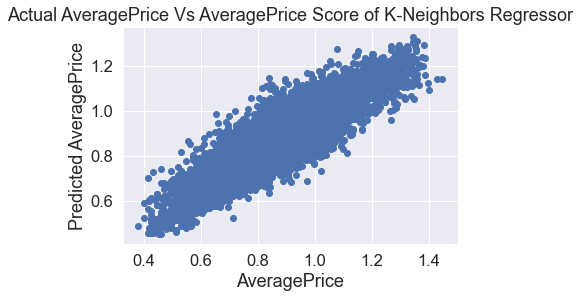

In [93]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yknpred)
plt.xlabel('AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual AveragePrice Vs AveragePrice Score of K-Neighbors Regressor')
plt.show()

In [94]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

In [95]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.7267827025440663


In [96]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  0.06486842743588701


In [97]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  0.007456494149924964


In [98]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  0.08635099391393804


# 2. SUPPORT VECTOR REGRESSOR:

In [99]:
#Model Training
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [100]:
#Prediction with trained data:
ysvrpred = kn.predict(x_train)

In [101]:
print("R Square Score of svr:", metrics.r2_score(y_train,ysvrpred))

R Square Score of svr: 0.8199611855195107


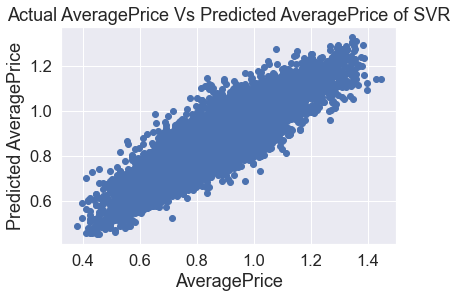

In [102]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ysvrpred)
plt.xlabel('AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual AveragePrice Vs Predicted AveragePrice of SVR')
plt.show()

In [103]:
# Predicting test data with model:
y_test_svr_pred = svr.predict(x_test)

In [104]:
svr_accuracy = metrics.r2_score(y_test,y_test_svr_pred)
print("R Square Score of SVR:",svr_accuracy)

R Square Score of SVR: 0.7093080100652771


In [105]:
print ('mean absolute error of SVR: ',mean_absolute_error(y_test,y_test_svr_pred))

mean absolute error of SVR:  0.07055653003237726


In [106]:
print ('mean squared error of SVR: ',mean_squared_error(y_test,y_test_svr_pred))

mean squared error of SVR:  0.007933403714045243


In [107]:
print ('Root mean squared error of SVR: ',np.sqrt(mean_squared_error(y_test,y_test_svr_pred)))

Root mean squared error of SVR:  0.08906965652816476


# ADABOOST REGRESSOR:

In [108]:
#Model Training
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [109]:
#Prediction with trained data:
yabrpred = abr.predict(x_train)

In [110]:
print("R Square Score of AdaBoostRegressor:", metrics.r2_score(y_train,yabrpred))

R Square Score of AdaBoostRegressor: 0.53598670673757


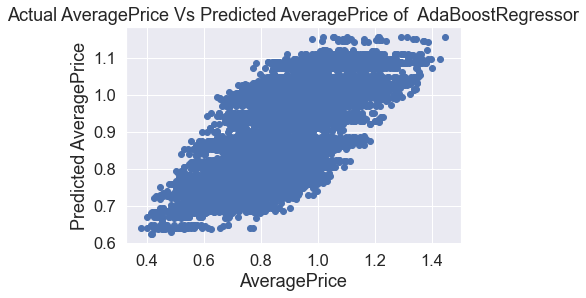

In [111]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yabrpred)
plt.xlabel('AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual AveragePrice Vs Predicted AveragePrice of  AdaBoostRegressor')
plt.show()

In [112]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

In [113]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of AdaBoostRegressor:",abr_accuracy)

R Square Score of AdaBoostRegressor: 0.5186105379932696


In [114]:
print ('mean absolute error of AdaBoostRegressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of AdaBoostRegressor:  0.09302832002663756


In [115]:
print ('mean squared error of AdaBoostRegressor: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of AdaBoostRegressor:  0.013137812798502067


In [116]:
print ('Root mean squared error of AdaBoostRegressor: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of AdaBoostRegressor:  0.11462029837032386


# 4.LINEAR  REGRESSION:

In [117]:
#Model Training
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [118]:
#Prediction with trained data:
ylrpred = lr.predict(x_train)

In [119]:
print("R Square Score of Linear Regression:", metrics.r2_score(y_train,ylrpred))

R Square Score of Linear Regression: 0.5310058002264733


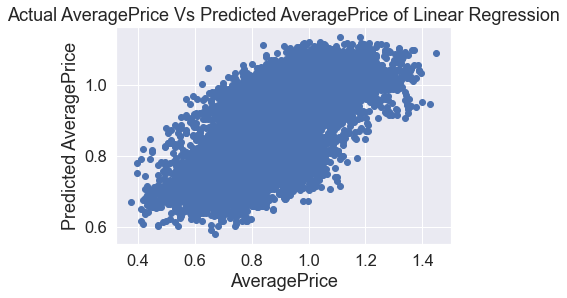

In [120]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ylrpred)
plt.xlabel('AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual AveragePrice Vs Predicted AveragePrice of Linear Regression')
plt.show()

In [121]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

In [122]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)

R Square Score of Linear Regression: 0.5163347028203149


In [123]:
print ('mean absolute error of Linear Regression: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of Linear Regression:  0.09019738101078426


In [124]:
print ('mean squared error of Linear Regression: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of Linear Regression:  0.01319992362315096


In [125]:
print ('Root mean squared error of Linear Regression: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of Linear Regression:  0.11489092054270851


# 5. XGB Regressor:

In [126]:
#Model Training
xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
#Prediction with trained data:
yxgpred = xg.predict(x_train)

In [128]:
print("R Square Score of svr:", metrics.r2_score(y_train,yxgpred))

R Square Score of svr: 0.9485495599875112


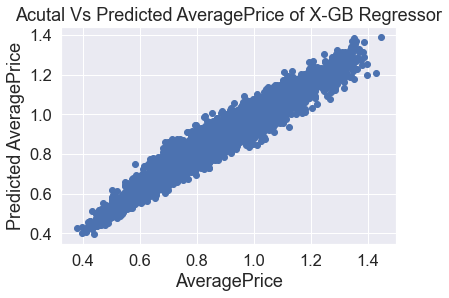

In [129]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yxgpred)
plt.xlabel('AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Acutal Vs Predicted AveragePrice of X-GB Regressor')
plt.show()

In [130]:
# Predicting test data with model:
y_test_xg_pred = xg.predict(x_test)

In [131]:
xg_accuracy = metrics.r2_score(y_test,y_test_xg_pred)
print("R Square Score of  X-GB Regressor:",xg_accuracy)

R Square Score of  X-GB Regressor: 0.8688993636648621


In [132]:
print ('mean absolute error of X-GB Regressor is: ',mean_absolute_error(y_test,y_test_xg_pred))

mean absolute error of X-GB Regressor is:  0.04554252614489903


In [133]:
print ('mean squared error of X-GB Regressor is: ',mean_squared_error(y_test,y_test_xg_pred))

mean squared error of X-GB Regressor is:  0.0035779254717284584


In [134]:
print ('Root mean squared error of X-GB Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_xg_pred)))

Root mean squared error of X-GB Regressor is:  0.059815762736326106


# 6.Random forest Regressor:

In [135]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [136]:
#Model Prediction with trained data:
y_rfr_pred = rfr.predict(x_train)

In [137]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rfr_pred))

R Square Score of Random Forest Regressor: 0.9786290352327659


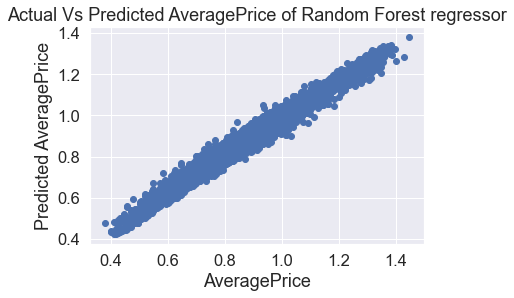

In [138]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rfr_pred)
plt.xlabel('AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual Vs Predicted AveragePrice of Random Forest regressor')
plt.show()

In [139]:
# Predicting test data with model:
y_test_rfr_pred = rfr.predict(x_test)

In [140]:
rfr_accuracy = metrics.r2_score(y_test,y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)

R Square Score of Random Forest Regressor: 0.8514477579653178


In [141]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rfr_pred))

mean absolute error of Random Forest Regressor:  0.04595735097655201


In [142]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rfr_pred))

mean squared error of Random Forest Regressor is:  0.004054204964341613


In [143]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rfr_pred)))

Root mean squared error of Random Forest Regressor is:  0.06367263905588973


# Regularization: 

In [144]:
#Regularization with Lasso
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [145]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

8.792286190145365e-07

In [146]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=8.792286190145365e-07)

In [147]:
lasso_reg.score(x_test,y_test)

0.5163337914185654

In [148]:
# Regularization with Ridge
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [149]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [150]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [151]:
ridge_model.score(x_test,y_test)

0.5163346987154025

# CROSS VALIDATION SCORE:

In [152]:
#Cv of KNN Regression
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean())

[0.70984617 0.6988394  0.69994299 0.71801814 0.71218855]
mean : 0.7077670502321045


In [153]:
#CV of Support Vector Regressor
svr_cv_score = cross_val_score(svr,x_train,y_train,cv=5,scoring='r2')
print(svr_cv_score)
print('mean :',svr_cv_score.mean())

[0.70070602 0.70594152 0.69139258 0.70313074 0.69220825]
mean : 0.6986758219772569


In [154]:
#CV of Adaboost Regressor
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean())

[0.54253257 0.53805209 0.52031338 0.55793422 0.52366032]
mean : 0.5364985161975365


In [155]:
#CV of Linear Regression
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean())

[0.5219763  0.53116773 0.52065466 0.54679683 0.52711692]
mean : 0.5295424878704889


In [156]:
#CV of XGB Regressor
xg_cv_score = cross_val_score(xg,x_train,y_train,cv=5,scoring='r2')
print(xg_cv_score)
print('mean :',xg_cv_score.mean())

[0.85979705 0.85233845 0.84547112 0.85342959 0.84751901]
mean : 0.8517110439592926


In [157]:
#CV of Random forrest regressor
rfr_cv_score = cross_val_score(rfr,x_train,y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean())

[0.84148044 0.83533664 0.82694132 0.83464551 0.82970428]
mean : 0.8336216379450775


In [158]:
ridge=Ridge()
parameters={'alpha':[0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,0.091]}
ridge_regressor = GridSearchCV(ridge,parameters,cv=5) 
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.011, 0.021, 0.031, 0.041, 0.051,
                                   0.061, 0.071, 0.081, 0.091]})

In [159]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.091}
0.5295425606029974


- Choosing Random forrest as the best model because ,we got less differece between the accuracy score and cross validation score.

# Hyper parameter Tuning with Random Forest Regressor model:

In [160]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [161]:
# Create the random grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [162]:
random_search=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,cv=5,n_jobs=-1)

In [163]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [164]:
best_parameters=random_search.best_params_
print(best_parameters)

{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}


In [165]:
rfr = RandomForestRegressor(n_estimators= 800, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 80, bootstrap= False)
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.8761844095873517

- After hyper parameter tuning we got 87.6% accuracy score for this model.

In [185]:
# model prediction using Linear Regression
x_predict = list(rfr.predict(x_test))
rfr_avocado = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rfr_avocado))

       predicted_values  orignal_values
12597          0.722621        0.683097
8150           0.719644        0.615186
6127           0.637956        0.470004
17449          1.005157        1.000632
11629          1.005755        0.908259
...                 ...             ...
6616           0.526800        0.457425
5319           0.795624        0.717840
5818           0.715398        0.746688
1020           0.741953        0.815365
16272          1.069437        1.108563

[4563 rows x 2 columns]


In [186]:
#import joblib
import joblib

joblib.dump(rfr,'rfr_avocado_file.obj')

# SAVING THE MODEL

['rfr_avocado_file.obj']

In [187]:
rfr_from_joblib=joblib.load('rfr_avocado_file.obj')
rfr_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([0.72262092, 0.71964436, 0.63795609, ..., 0.71539843, 0.74195332,
       1.06943676])

# Conclusion:
- After analyzing and visualizing the data, we came up with some insights:

- Dallas/Ft. Worth, Houston, and South Central seem to have cheaper avocado prices compared to other locations in the U.S. while New York, Hartfold/Springfield, and San Francisco have more expensive avocado prices. Phoenix/Tucson also has low prices for conventional avocados, but their organic avocados are pretty expensive. We can conclude that Dallas/Ft. Worth, Houston, and South Central are the best places to live if you don't want to go bankrupt from buying avocados

- Avocado prices vary over time. Sometimes the prices spike and other times their prices dip low.

- The number of avocados being bought over time is increasing. Even though both organic and conventional avocado consumption are increasing, organic avocados seem to be having a more consistent and higher increase in consumption than conventional avocados.

- When plotting avocado prices vs number of avocados bought, it looks like less avocados are bought when the prices are high. However, we cannot accurately predict how many avocados are bought based solely on the price.

- Overall, it seems like avocados are not getting any less popular. However, if we want to predict how many avocados will be bought, we need to take into consideration more parameters than just the price of the avocados.